In [ ]:
import numpy as np
import tensorflow as tf

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [ ]:
# train_data and test_data are lists of reviews
# each review is a list of word indices (encoding a sequence of words)
# train_labels and test_labels are lists of 0s and 1s, where 0 stands for negative and 1 stands for positive:


print(train_data[2])
print(train_labels)

[1, 14, 47, 8, 30, 31, 7, 4, 249, 108, 7, 4, 5974, 54, 61, 369, 13, 71, 149, 14, 22, 112, 4, 2401, 311, 12, 16, 3711, 33, 75, 43, 1829, 296, 4, 86, 320, 35, 534, 19, 263, 4821, 1301, 4, 1873, 33, 89, 78, 12, 66, 16, 4, 360, 7, 4, 58, 316, 334, 11, 4, 1716, 43, 645, 662, 8, 257, 85, 1200, 42, 1228, 2578, 83, 68, 3912, 15, 36, 165, 1539, 278, 36, 69, 2, 780, 8, 106, 14, 6905, 1338, 18, 6, 22, 12, 215, 28, 610, 40, 6, 87, 326, 23, 2300, 21, 23, 22, 12, 272, 40, 57, 31, 11, 4, 22, 47, 6, 2307, 51, 9, 170, 23, 595, 116, 595, 1352, 13, 191, 79, 638, 89, 2, 14, 9, 8, 106, 607, 624, 35, 534, 6, 227, 7, 129, 113]
[1 0 0 ... 0 1 0]


In [ ]:
# I need to transform the lists of different size into tensors
# turning the sequence [8, 5] into a 10,000-dimensional vector that would be all 0s except for indices 8 and 5, which would be 1s

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))  # Creates an all-zero matrix of shape (len(sequences), dimension)
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.        # Sets specific indices of results[i] to 1
    return results
x_train = vectorize_sequences(train_data)    # Vectorized training data
x_test = vectorize_sequences(test_data)      # Vectorized test data

print(x_train[2])

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

[0. 1. 1. ... 0. 0. 0.]


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [ ]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
# standard practice is to use a validation set to monitor the accuracy of the model during training.
# Here, we’ll create a validation set by setting apart 10,000 samples from the original training data.

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
# Now train the model for 20 epochs (20 iterations over all samples in the training data) in mini-batches of 512 samples.
# At the same time, we will monitor loss and accuracy on the 10,000 samples that we set apart.
# We do so by passing the validation data as the validation_data argument.

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=4,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - accuracy: 0.9993 - loss: 0.0116 - val_accuracy: 0.8679 - val_loss: 0.5793
Epoch 2/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9998 - loss: 0.0084 - val_accuracy: 0.8586 - val_loss: 0.6918
Epoch 3/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9984 - loss: 0.0112 - val_accuracy: 0.8696 - val_loss: 0.6229
Epoch 4/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9990 - loss: 0.0075 - val_accuracy: 0.8684 - val_loss: 0.6360


In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

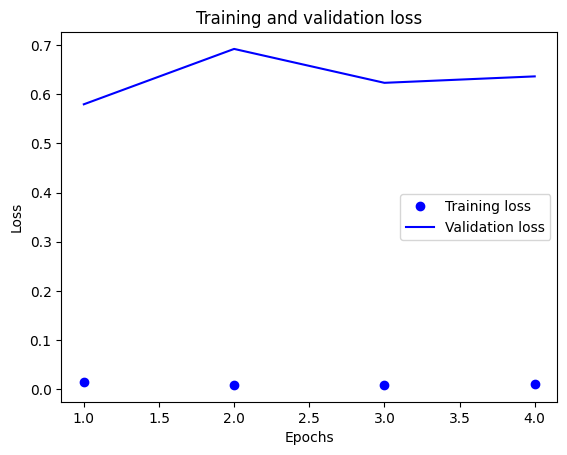

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

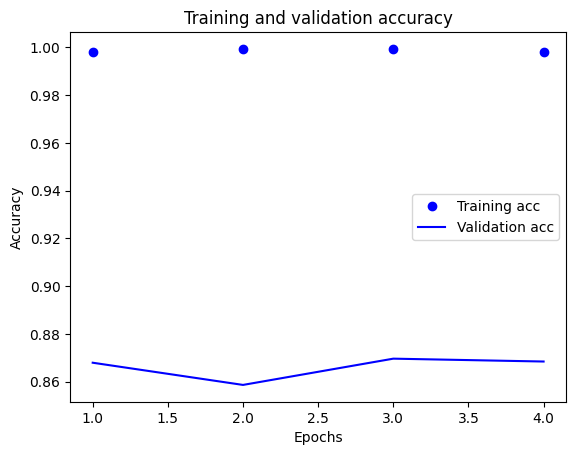

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.012646  ],
       [0.99999994],
       [0.9767196 ],
       ...,
       [0.00161766],
       [0.00409259],
       [0.98989105]], dtype=float32)

Try using layers with more units or fewer units: 32 units, 64 units, and so on.
Try using the mse loss function instead of binary_crossentropy.
Try using the tanh activation (an activation that was popular in the early days of neural networks) instead of relu.

In [ ]:
# More layers

model = keras.Sequential([
    layers.Dense(32, activation="tanh"),
    layers.Dense(32, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

istory = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - accuracy: 0.6806 - loss: 0.1994 - val_accuracy: 0.8242 - val_loss: 0.1254
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.8842 - loss: 0.0925 - val_accuracy: 0.8634 - val_loss: 0.0996
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.9133 - loss: 0.0671 - val_accuracy: 0.8877 - val_loss: 0.0823
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - accuracy: 0.9356 - loss: 0.0516 - val_accuracy: 0.8807 - val_loss: 0.0871
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9499 - loss: 0.0420 - val_accuracy: 0.8664 - val_loss: 0.0999
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9573 - loss: 0.0368 - val_accuracy: 0.8811 - val_loss: 0.0880
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.9636 - loss: 0.0307 - val_accuracy: 0.8816 - val_loss: 0.0907
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.9684 - loss: 0.0278 - val_accuracy: 0.8796 - v